In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#from tensorflow.keras import models, layers
#from tensorflow.keras.utils import to_categorical

In [3]:
#Load Data for standard and MinMax
train_standard_df = pd.read_csv('./train_standard.csv')
test_standard_df = pd.read_csv('./test_standard.csv')
train_minmax_df = pd.read_csv('./train_minmax.csv')
test_minmax_df = pd.read_csv('./test_minmax.csv')

In [4]:
# Separate features and target for both standard and minmax datasets
X_train_standard = train_standard_df.drop(columns=['target'])
y_train_standard = train_standard_df['target']
X_test_standard = test_standard_df.drop(columns=['target'])
y_test_standard = test_standard_df['target']

X_train_minmax = train_minmax_df.drop(columns=['target'])
y_train_minmax = train_minmax_df['target']
X_test_minmax = test_minmax_df.drop(columns=['target'])
y_test_minmax = test_minmax_df['target']

In [5]:
# Helper function to evaluate and print model metrics including confusion matrix
def evaluate_model(y_true, y_pred, y_proba=None):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    if y_proba is not None:
        print("ROC AUC Score:", roc_auc_score(y_true, y_proba))
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


In [6]:
# Logistic Regression Model
def logistic_regression_model(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # For ROC AUC Score
    print("Logistic Regression Metrics:")
    evaluate_model(y_test, y_pred, y_proba)


In [ ]:
# Feedforward Neural Network Model
def fnn_model(X_train, y_train, X_test, y_test, input_dim):
    # One-hot encoding for binary classification (if target is binary 0/1)
    y_train_cat = to_categorical(y_train, num_classes=2)
    y_test_cat = to_categorical(y_test, num_classes=2)
    
    # Define the model
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(2, activation='softmax')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, y_train_cat, epochs=10, batch_size=32, verbose=0, validation_split=0.1)
    
    # Predictions and Evaluation
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_proba = model.predict(X_test)[:, 1]  # Probability of positive class
    print("Feedforward Neural Network Metrics:")
    evaluate_model(y_test, y_pred, y_proba)

Standard Scaled Data:
Logistic Regression Metrics:
Accuracy: 0.9251012145748988
Precision: 0.75
Recall: 0.20930232558139536
F1 Score: 0.32727272727272727
ROC AUC Score: 0.8201412880936421


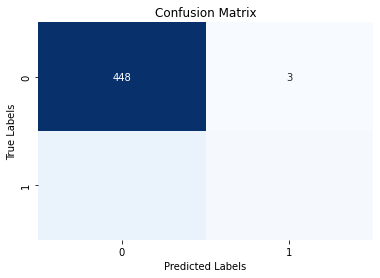

In [7]:
# Running models on Standard Scaled data
print("Standard Scaled Data:")
logistic_regression_model(X_train_standard, y_train_standard, X_test_standard, y_test_standard)
#fnn_model(X_train_standard, y_train_standard, X_test_standard, y_test_standard, input_dim=X_train_standard.shape[1])



MinMax Scaled Data:
Logistic Regression Metrics:
Accuracy: 0.917004048582996
Precision: 0.5714285714285714
Recall: 0.18604651162790697
F1 Score: 0.2807017543859649
ROC AUC Score: 0.8349920074253596


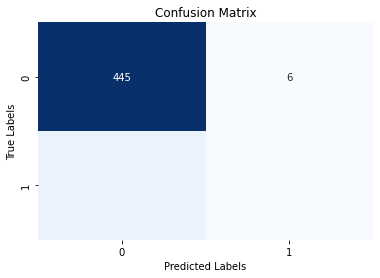

In [8]:
# Running models on MinMax Scaled data
print("\nMinMax Scaled Data:")
logistic_regression_model(X_train_minmax, y_train_minmax, X_test_minmax, y_test_minmax)
#fnn_model(X_train_minmax, y_train_minmax, X_test_minmax, y_test_minmax, input_dim=X_train_minmax.shape[1])